In [1]:
import torch

In [2]:
print(torch.__version__)

2.1.0+cu118


In [3]:
print(torch.cuda.is_available())

True


In [4]:
! pip install transformers accelerate


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
from transformers import pipeline
from PIL import Image
import requests

In [6]:
model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id, torch_dtype=torch.bfloat16, device="cuda")


/usr/local/lib/python3.10/dist-packages/transformers/models/llava/configuration_llava.py:104: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


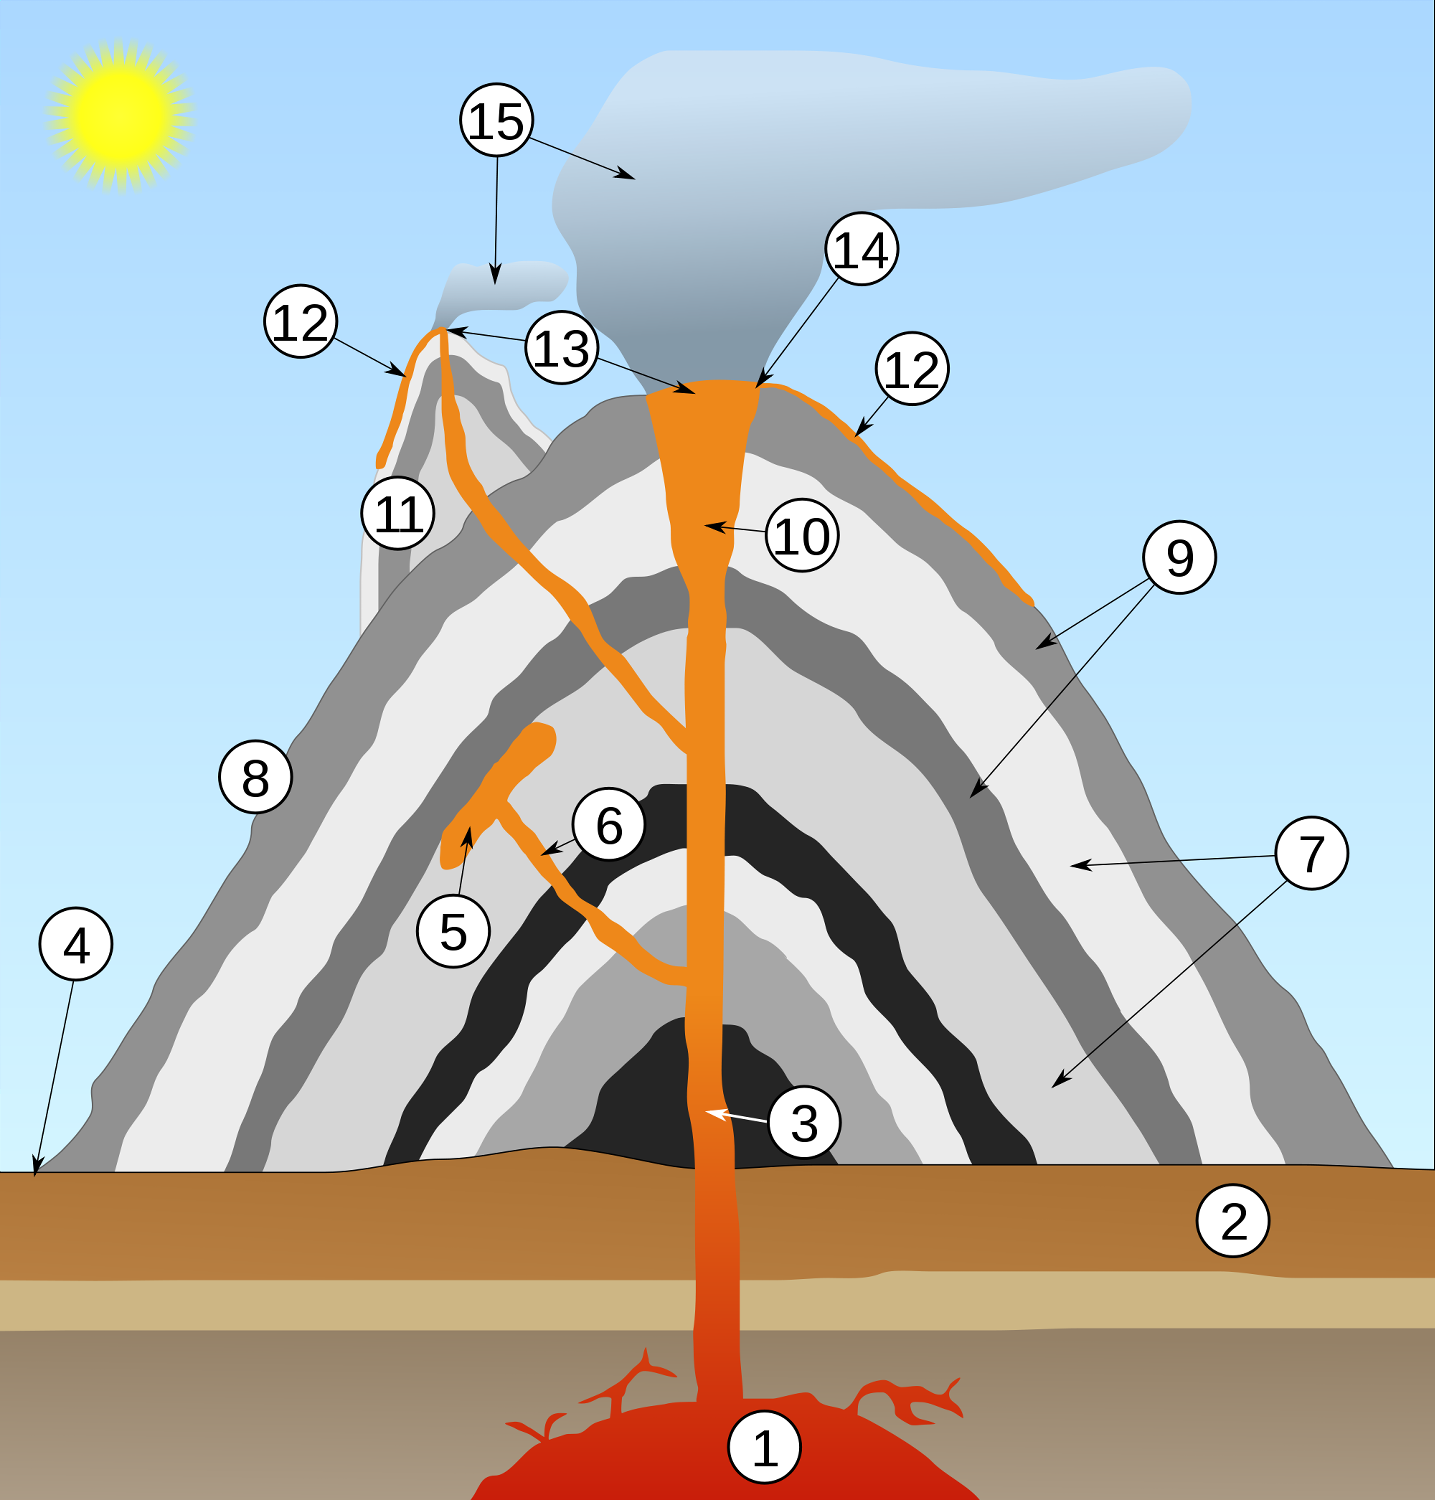

In [7]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [20]:
prompt = """ USER: 

            <image>
            
            What does the label 15 represent? 

            Choose one of the following and explain the reason for selecting it
            
            (1) lava 
            (2) core 
            (3) tunnel 
            (4) ash cloud
            
            ASSISTANT: """

In [21]:
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 1024})


In [22]:
print(outputs)

[{'generated_text': ' USER: \n\n             \n            \n            What does the label 15 represent? \n\n            Choose one of the following and explain the reason for selecting it\n            \n            (1) lava \n            (2) core \n            (3) tunnel \n            (4) ash cloud\n            \n            ASSISTANT: \n\nThe label 15 represents the ash cloud. This is indicated by the presence of a cloud symbol on the diagram. The ash cloud is a natural phenomenon that occurs when a volcano erupts, and it is characterized by the release of ash particles into the atmosphere. The ash cloud can be harmful to human health and the environment, as it can cause respiratory problems and contribute to climate change. The presence of the ash cloud in the image suggests that the volcano is active and poses a potential threat to the surrounding area.'}]


In [23]:
print(outputs[0]['generated_text'])

 USER: 

             
            
            What does the label 15 represent? 

            Choose one of the following and explain the reason for selecting it
            
            (1) lava 
            (2) core 
            (3) tunnel 
            (4) ash cloud
            
            ASSISTANT: 

The label 15 represents the ash cloud. This is indicated by the presence of a cloud symbol on the diagram. The ash cloud is a natural phenomenon that occurs when a volcano erupts, and it is characterized by the release of ash particles into the atmosphere. The ash cloud can be harmful to human health and the environment, as it can cause respiratory problems and contribute to climate change. The presence of the ash cloud in the image suggests that the volcano is active and poses a potential threat to the surrounding area.
